In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/Users/robertwrobel/Code/Python4Statistics/Notebooks/housing.csv')

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1330000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,1225000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1225000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1221500,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,1141000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


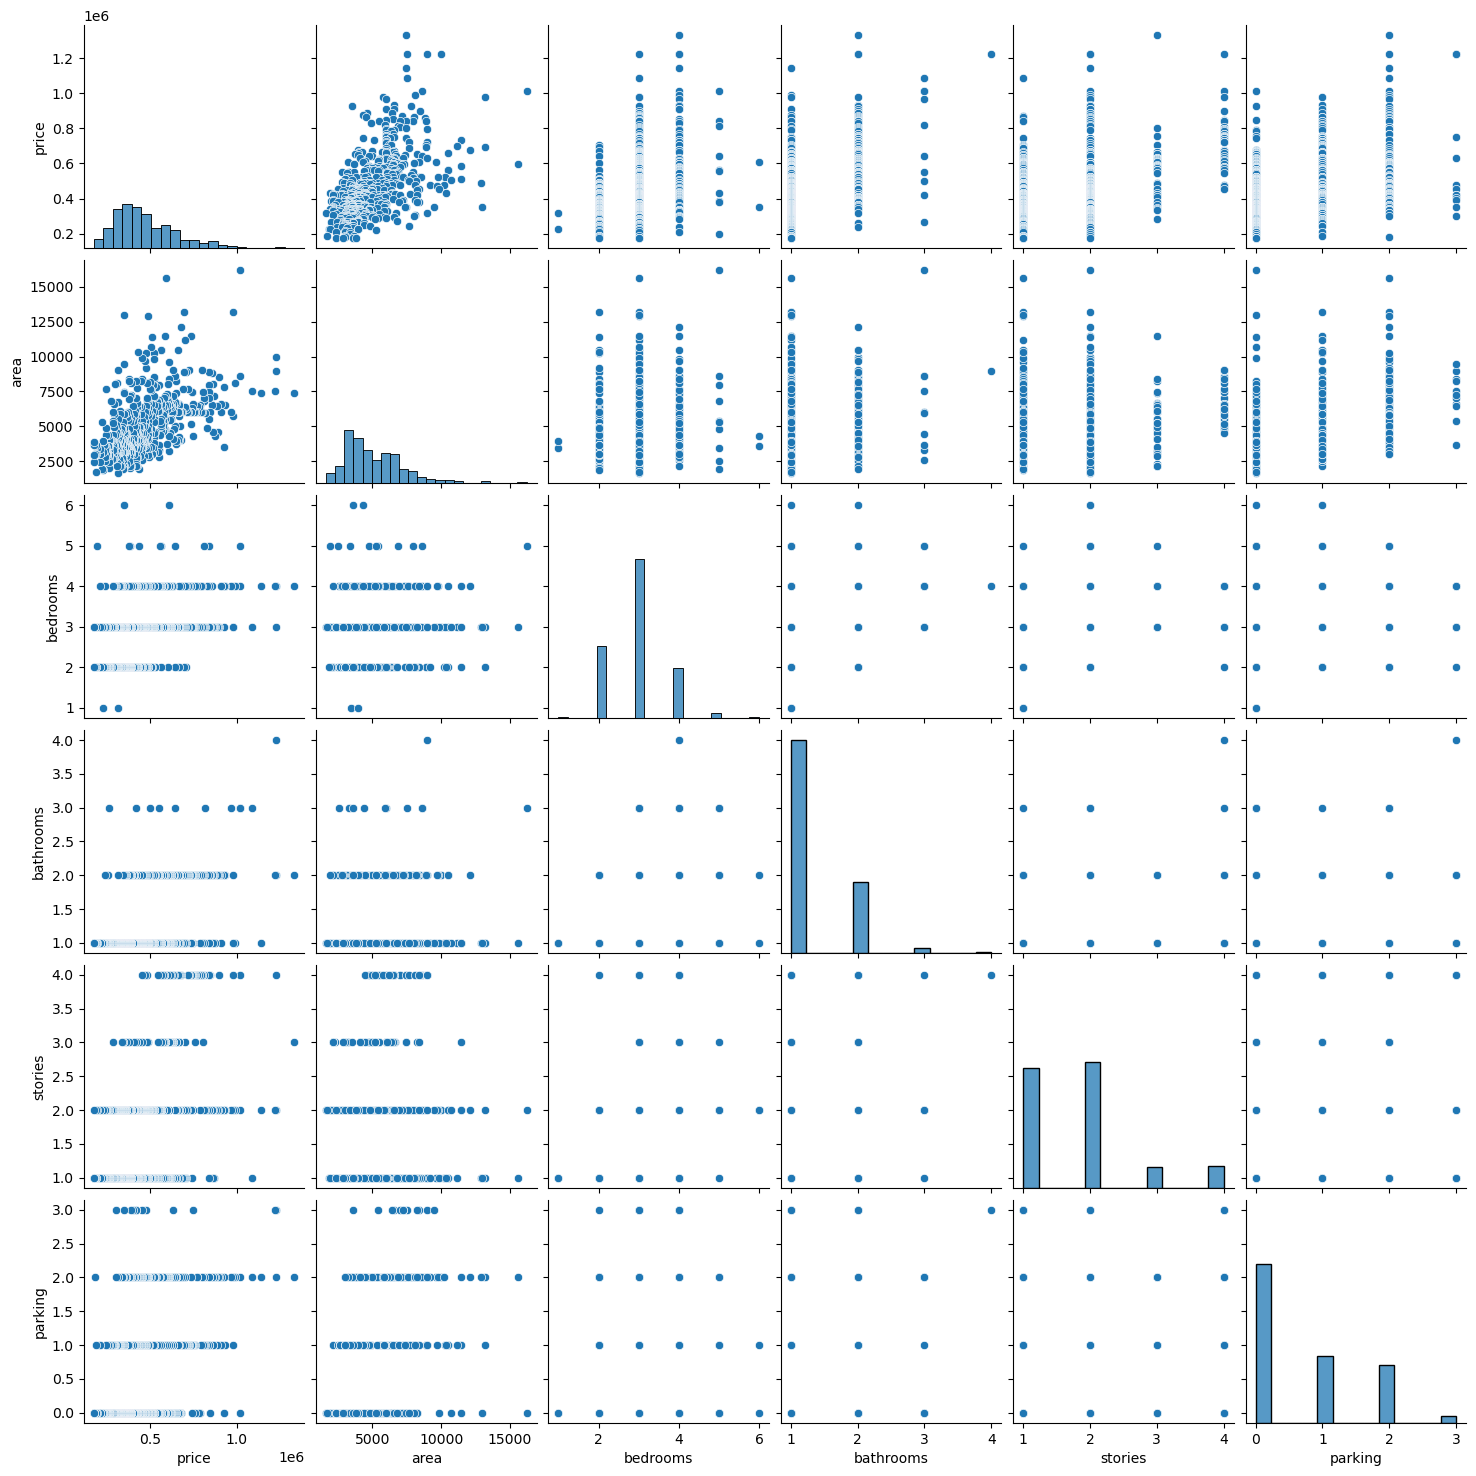

In [10]:
sns.pairplot(df)

In [17]:
model1 = sm.OLS.from_formula('price ~ area', df)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           7.39e-42
Time:                        09:42:41   Log-Likelihood:                -7296.3
No. Observations:                 545   AIC:                         1.460e+04
Df Residuals:                     543   BIC:                         1.461e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.387e+05   1.74e+04     13.681      0.000    2.04e+05    2.73e+05
area          46.1975      3.123     14.795      0.000      40.064      52.331
==============================================================================
Omnibus:                       92.668   Durbin-Watson:                   0.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.673
Skew:                           0.954   Prob(JB):                     1.31e-40
Kurtosis:                       5.108   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Gather Regression Statistics
rsquared = results.rsquared
adj_rsquared = results.rsquared_adj
parameters = results.params
tvalues = results.tvalues
pvalues = results.pvalues
fstat = results.fvalue
aic = results.aic
bic = results.bic
ci = results.conf_int(alpha=0.01)

In [15]:
#Gather fitted values and residuals
yhat = results.fittedvalues
e = results.resid

In [19]:
model2 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms', df)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     171.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.80e-78
Time:                        09:43:05   Log-Likelihood:                -7206.7
No. Observations:                 545   AIC:                         1.442e+04
Df Residuals:                     541   BIC:                         1.444e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.732e+04   2.65e+04     -0.655      0.513   -6.93e+04    3.47e+04
area          37.8763      2.716     13.948      0.000      32.542      43.211
bedrooms    4.068e+04   8445.788      4.817      0.000    2.41e+04    5.73e+04
bathrooms   1.386e+05   1.25e+04     11.089      0.000    1.14e+05    1.63e+05
==============================================================================
Omnibus:                       70.408   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.930
Skew:                           0.738   Prob(JB):                     9.19e-32
Kurtosis:                       5.029   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Recode categorical variables as binary
df = pd.get_dummies(df, drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1330000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,1225000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,1225000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,1221500,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,1141000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [27]:
model3 = sm.OLS.from_formula('price ~ area + bedrooms + bathrooms + basement_yes', df)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           7.36e-80
Time:                        09:49:44   Log-Likelihood:                -7199.8
No. Observations:                 545   AIC:                         1.441e+04
Df Residuals:                     540   BIC:                         1.443e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.213e+04   2.62e+04     -0.845      0.398   -7.36e+04    2.93e+04
area            37.6476      2.684     14.024      0.000      32.374      42.921
bedrooms      3.875e+04   8362.925      4.634      0.000    2.23e+04    5.52e+04
bathrooms     1.355e+05   1.24e+04     10.946      0.000    1.11e+05     1.6e+05
basement_yes  4.477e+04    1.2e+04      3.728      0.000    2.12e+04    6.84e+04
==============================================================================
Omnibus:                       71.371   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.341
Skew:                           0.751   Prob(JB):                     7.48e-32
Kurtosis:                       5.014   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1
eval_env: 1


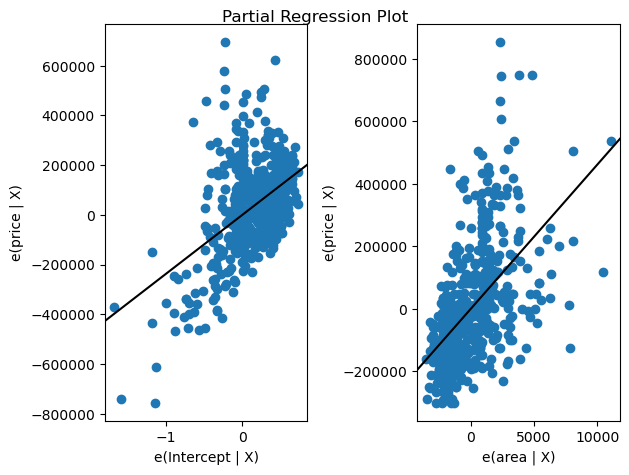

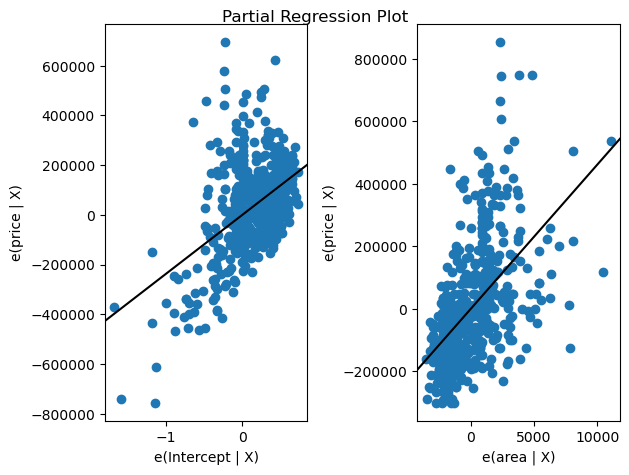

In [83]:
sm.graphics.plot_partregress_grid(results)


In [50]:
predictions = pd.DataFrame({'bedrooms': [1, 1, 2, 2, 3],
                            'bathrooms': [1, 1, 2, 2, 1],
                            'area':[1500,2000,2500,3000,3500],
                            'basement_yes':[1,0,1,0,1]})

predictions['estimated price'] = results.predict(predictions)
print(predictions)

   bedrooms  bathrooms  area  basement_yes  estimated price
0         1          1  1500             1    308027.082381
1         1          1  2000             0    331125.827094
2         2          2  2500             1    354224.571808
3         2          2  3000             0    377323.316521
4         3          1  3500             1    400422.061235


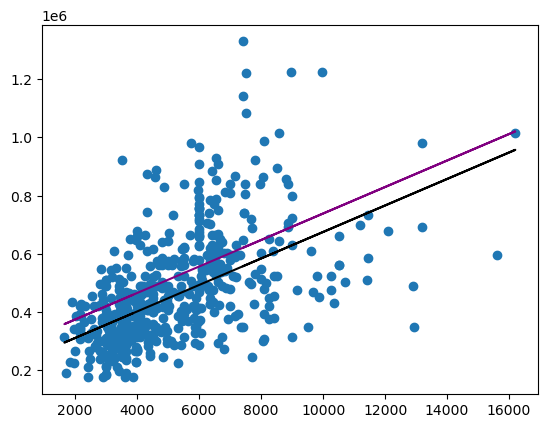

In [71]:
model = sm.OLS.from_formula('price ~ area + basement_yes', data=df).fit()
price = df.price
area = df.area

b0 = model.params[0]
b1 = model.params[1]
b2 = model.params[2]

price_wo_basement = b0 + (b1 * area) + (b2 * 0)
price_w_basement = b0 + (b1 * area) + (b2 * 1)

plt.scatter(area,price)
plt.plot(area, price_wo_basement, color='black')
plt.plot(area, price_w_basement, color='purple')

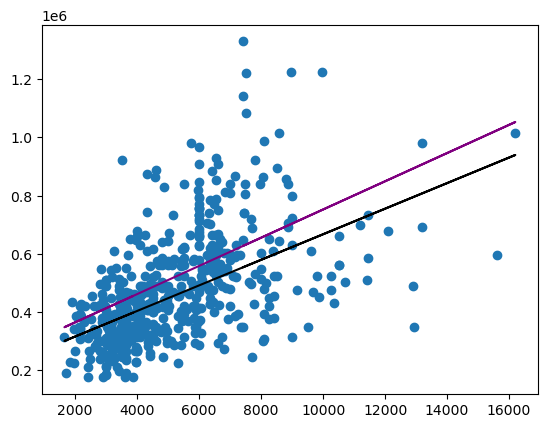

In [81]:
#Categorical interaction term
model = sm.OLS.from_formula('price ~ area + basement_yes + area:basement_yes', data=df).fit()
price = df.price
area = df.area
basement_yes = df.basement_yes
areaXbasement_yes = area * basement_yes

b0 = model.params[0] #intercept
b1 = model.params[1] #area
b2 = model.params[2] #basement_yes
b3 = model.params[3] #interaction


price_wo_basement = b0 + (b1 * area) + (b2 * 0) + (b3 * area * 0)
price_w_basement = b0 + (b1 * area) + (b2 * 1) + (b3 * area * 1)

plt.scatter(area,price)
plt.plot(area, price_wo_basement, color='black')
plt.plot(area, price_w_basement, color='purple')

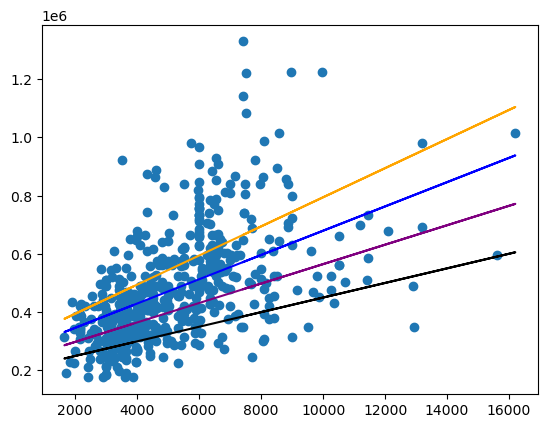

In [80]:
#More interaction
model = sm.OLS.from_formula('price ~ area + bedrooms + area:bedrooms', data=df).fit()
price = df.price
area = df.area
bedrooms = df.bedrooms
areaXbedrooms = area * bedrooms

b0 = model.params[0] #intercept
b1 = model.params[1] #area
b2 = model.params[2] #bedrooms
b3 = model.params[3] #interaction


price_w_1br = b0 + (b1 * area) + (b2 * 1) + (b3 * area * 1)
price_w_2br = b0 + (b1 * area) + (b2 * 2) + (b3 * area * 2)
price_w_3br = b0 + (b1 * area) + (b2 * 3) + (b3 * area * 3)
price_w_4br = b0 + (b1 * area) + (b2 * 4) + (b3 * area * 4)


plt.scatter(area,price)
plt.plot(area, price_w_1br, color='black')
plt.plot(area, price_w_2br, color='purple')
plt.plot(area, price_w_3br, color='blue')
plt.plot(area, price_w_4br, color='orange')

In [82]:
#Comparing models

models = ['model1','model2','model3']
r_squared = [results1.rsquared, results2.rsquared, results3.rsquared]
adj_r_squared = [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj]
aic = [results1.aic, results2.aic, results3.aic]
bic = [results1.bic, results2.bic, results3.bic]

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared           AIC           BIC
0  model1   0.287293            0.285981  14596.676566  14605.278138
1  model2   0.487083            0.484239  14421.395399  14438.598542
2  model3   0.499950            0.496246  14409.548998  14431.052927


In [ ]:
#Transforming Variables - Logs, Squares, and Inverses
df['log_x'] = np.log(df['x']) #Log(x)
df['x_squared'] = df['x'] * df['x'] #x^2
df['x_inverse'] = 1/df['x'] #1/x

#Transforming Variables - Interaction Terms
df['xINTERACTd1'] = df['x'] * df['d1'] #Categorical
df['xINTERACTz'] = df['x'] * df['z'] #Continuous

#Transforming Variables - Lagged X Variables
df['x_lag_1'] = df['x'].shift(1)  #1 Period Lag
df['x_lag_2'] = df['x'].shift(2)  #2 Period Lag 
df['x_lag_3'] = df['x'].shift(3)  #3 Period Lag 

#Lagged Y Variable
df['y_lag_1'] = df['y'].shift(1)  #1 Period Lag 
df['y_lag_2'] = df['y'].shift(2)  #2 Period Lag 
df['y_lag_3'] = df['y'].shift(3)  #3 Period Lag 